In [2]:
import Su22
import qiskit as qk
import numpy as np
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.providers.aer.noise import NoiseModel
import matplotlib
import matplotlib.pyplot as plt
from qiskit.visualization import plot_bloch_multivector
from qiskit.tools.monitor import job_monitor

from qiskit import pulse              
from qiskit.circuit import Parameter 
from IPython.display import display
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
import warnings
warnings.filterwarnings('ignore')
from qiskit.tools.jupyter import *
# The pulse simulator
from qiskit.providers.aer import PulseSimulator

# Object for representing physical models
from qiskit.providers.aer.pulse import PulseSystemModel
token = '792003cde0750f1452faa5cb5fe7c57da849e1119983f608e9a359d49cdb396391d6af09eedfb46af0a043a01103ed64da66835d1a318c0013d64ab3ebc1fe61'
qk.IBMQ.save_account(token=token)
qk.IBMQ.enable_account(token)
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy147')
#backend = provider.get_backend("ibmq_jakarta")
from qiskit.test.mock import FakeJakarta

backend = provider.get_backend("ibmq_jakarta")

configrc.store_credentials:WARNING:2022-07-15 09:32:13,348: Credentials already present. Set overwrite=True to overwrite.


In [21]:
from qiskit.providers.ibmq.managed import IBMQJobManager


job_manager = IBMQJobManager()
job_set = job_manager.retrieve_job_set('28065b3e2ed94296b99fd982f0bd6f70-16579003756865842',provider)
results = job_set.results()
    


In [46]:
#job= backend.retrieve_job('62d17565c63c646ce010dfc1')
#results = job.result()
prob = 0
counter = 0
start=0.02
end=0.98#start+((0.98-0.02)/10)
num_center_freqs=100
center_idxs=[]
centers=[]
all_probs = np.zeros([num_center_freqs, 2])
num_noise_trajs= 30
shots = 4000
circ_batch = np.zeros(num_center_freqs*num_noise_trajs)
for center_idx, center in enumerate(np.linspace(start, end, num_center_freqs)): # vary noise center frequency
        center_idxs.append(center_idx)
        centers.append(center)
cc=0
for i in range(int(len(circ_batch)/num_noise_trajs)):
    for circ in circ_batch[i*num_noise_trajs:((i+1)*num_noise_trajs)]:
        zero_counts = results.get_counts(cc).get('1')
        prob += zero_counts/shots
        cc+=1
    prob = prob/num_noise_trajs
    all_probs[center_idxs[counter], :] = centers[counter], prob
    counter+=1
    prob=0

Text(0.5, 0, 'Center Frequency')

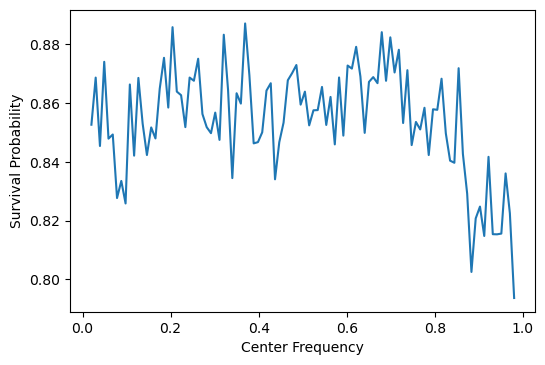

In [47]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax.plot(all_probs[:,0], all_probs[:,1])
ax.set_ylabel('Survival Probability')
ax.set_xlabel('Center Frequency')

In [44]:
for i in (results):
    print(results.get_counts(i))

TypeError: 'ManagedResults' object is not iterable

In [48]:
print(all_probs)

[[0.02       0.8526    ]
 [0.02969697 0.868625  ]
 [0.03939394 0.84536667]
 [0.04909091 0.87399167]
 [0.05878788 0.84786667]
 [0.06848485 0.849275  ]
 [0.07818182 0.827675  ]
 [0.08787879 0.83349167]
 [0.09757576 0.825825  ]
 [0.10727273 0.86628333]
 [0.1169697  0.84208333]
 [0.12666667 0.86851667]
 [0.13636364 0.85295833]
 [0.14606061 0.8423    ]
 [0.15575758 0.851675  ]
 [0.16545455 0.84793333]
 [0.17515152 0.86486667]
 [0.18484848 0.87535   ]
 [0.19454545 0.85843333]
 [0.20424242 0.88576667]
 [0.21393939 0.86386667]
 [0.22363636 0.86264167]
 [0.23333333 0.85178333]
 [0.2430303  0.86863333]
 [0.25272727 0.86755   ]
 [0.26242424 0.87503333]
 [0.27212121 0.85623333]
 [0.28181818 0.851775  ]
 [0.29151515 0.849725  ]
 [0.30121212 0.856725  ]
 [0.31090909 0.84744167]
 [0.32060606 0.8832    ]
 [0.33030303 0.86444167]
 [0.34       0.83445   ]
 [0.34969697 0.8633    ]
 [0.35939394 0.85978333]
 [0.36909091 0.88703333]
 [0.37878788 0.86935833]
 [0.38848485 0.84625833]
 [0.39818182 0.846675  ]
